In [ ]:
# install nltk
!pip install nltk

In [52]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving Sheet_2.csv to Sheet_2 (1).csv
{'Sheet_2 (1).csv': b'resume_id,class,resume_text\r\nresume_1,not_flagged,"\rCustomer Service Supervisor/Tier - Isabella Catalog Company\rSouth Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26\rWORK EXPERIENCE\rCustomer Service Supervisor/Tier\rIsabella Catalog Company - Shelburne VT - August 2015 to Present\r2 Customer Service/Visual Set Up & Display/Website Maintenance\r\x8a\x97\xa2 Supervise customer service team of a popular catalog company\r\x8a\x97\xa2 Manage day to day issues and resolution of customer upset to ensure customer satisfaction\r\x8a\x97\xa2 Troubleshoot order and shipping issues: lost in transit order errors damages\r\x8a\x97\xa2 Manage and resolve escalated customer calls to ensure customer satisfaction\r\x8a\x97\xa2 Assist customers with order placing cross-selling/upselling of catalog merchandise\r\x8a\x97\xa2 Set up and display of sample merchandise in catalog library as well as customer pick-up area of the

In [ ]:
# install gensim
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 72.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!pip install jupyterthemes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.7 MB/s eta 0:00:00


In [ ]:
# load the data
resume_df = pd.read_csv('/content/Sheet_2.csv', encoding='latin-1')
resume_df

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [ ]:
resume_df.head(10)

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
5,resume_6,not_flagged,\rPoultney VT - Email me on Indeed: indeed.com...
6,resume_7,not_flagged,\rMedical Laboratory Scientist (Special Chemis...
7,resume_8,flagged,Statistician\rBurlington VT - Email me on Inde...
8,resume_9,not_flagged,Research technician\rBurlington VT - Email me ...
9,resume_10,not_flagged,Barbara Hennessey-Elzohairy\rNewport VT - Emai...


In [ ]:
resume_df.tail(10)

,resume_id,class,resume_text
115,resume_116,flagged,\rEssex Jct VT - Email me on Indeed: indeed.co...
116,resume_117,not_flagged,Postdoctoral Associate - University of Vermon...
117,resume_118,flagged,\rSpatial Analyst and UAV Flight Operator - Sp...
118,resume_119,flagged,| Bioinformatics Analyst\rBurlington VT - Ema...
119,resume_120,not_flagged,Professional\rNewbury VT - Email me on Indeed:...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...
124,resume_125,not_flagged,\rResearch and Development Scientist - Burling...


In [ ]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_id    125 non-null    object
 1   class        125 non-null    object
 2   resume_text  125 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB


In [ ]:
# check for null values
resume_df.isnull().sum()

,0
resume_id,0
class,0
resume_text,0


In [ ]:
resume_df['class'].value_counts()

,count
class,
not_flagged,92
flagged,33


In [ ]:
resume_df['class'] = resume_df['class'].apply(lambda x:1 if x == 'flagged' else 0)
resume_df

,resume_id,class,resume_text
0,resume_1,0,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,0,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,0,\rLTS Software Engineer Computational Lithogra...
3,resume_4,0,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,1,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,0,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,0,\rResearch and Teaching Assistant - University...
122,resume_123,0,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,1,\rWaterbury VT - Email me on Indeed: indeed.co...


In [ ]:
class_0_df = resume_df[resume_df['class'] == 0]
class_0_df

,resume_id,class,resume_text
0,resume_1,0,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,0,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,0,\rLTS Software Engineer Computational Lithogra...
3,resume_4,0,TUTOR\rWilliston VT - Email me on Indeed: ind...
5,resume_6,0,\rPoultney VT - Email me on Indeed: indeed.com...
...,...,...,...
119,resume_120,0,Professional\rNewbury VT - Email me on Indeed:...
120,resume_121,0,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,0,\rResearch and Teaching Assistant - University...
122,resume_123,0,\rMedical Coder - Highly Skilled - Entry Level...


In [ ]:
class_1_df = resume_df[resume_df['class'] == 1]
class_1_df

,resume_id,class,resume_text
4,resume_5,1,\rIndependent Consultant - Self-employed\rBurl...
7,resume_8,1,Statistician\rBurlington VT - Email me on Inde...
10,resume_11,1,Barbara Kurth\rResearch Assistant Professor Cl...
15,resume_16,1,Caroline Clauson Work Study Student\rBrattlebo...
17,resume_18,1,Chelsea Martin\rEnvironmental Scientist - Vana...
18,resume_19,1,Christopher Fusting Data Science Consultant\rB...
23,resume_24,1,David Grass\rCity Research Scientist - Environ...
24,resume_25,1,David Lucero Public Health Analyst\rBurlington...
27,resume_28,1,Drew Burkhard\rEnvironmental Scientist Meets M...
31,resume_32,1,Eric Anderson Data Scientist\rBrattleboro VT -...


In [ ]:
resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x.replace('\r',''))
resume_df

,resume_id,class,resume_text
0,resume_1,0,Customer Service Supervisor/Tier - Isabella Ca...
1,resume_2,0,Engineer / Scientist - IBM Microelectronics Di...
2,resume_3,0,LTS Software Engineer Computational Lithograph...
3,resume_4,0,TUTORWilliston VT - Email me on Indeed: indee...
4,resume_5,1,Independent Consultant - Self-employedBurlingt...
...,...,...,...
120,resume_121,0,Brattleboro VT - Email me on Indeed: indeed.co...
121,resume_122,0,Research and Teaching Assistant - University o...
122,resume_123,0,Medical Coder - Highly Skilled - Entry LevelSu...
123,resume_124,1,Waterbury VT - Email me on Indeed: indeed.com/...


In [ ]:
# download nltk packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# download nltk packages
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'email', 'com'])

In [ ]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)

    return ' '.join(result)

In [ ]:
# Cleaned text
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)

In [ ]:
resume_df

,resume_id,class,resume_text,cleaned
0,resume_1,0,Customer Service Supervisor/Tier - Isabella Ca...,customer service supervisor tier isabella cata...
1,resume_2,0,Engineer / Scientist - IBM Microelectronics Di...,engineer scientist ibm albert gregoritsch ecaw...
2,resume_3,0,LTS Software Engineer Computational Lithograph...,lts software engineer computational lithograph...
3,resume_4,0,TUTORWilliston VT - Email me on Indeed: indee...,tutorwilliston alec schwartz awork college bio...
4,resume_5,1,Independent Consultant - Self-employedBurlingt...,independent consultant self alex reutter fefwo...
...,...,...,...,...
120,resume_121,0,Brattleboro VT - Email me on Indeed: indeed.co...,brattleboro bcc skilled presenter trainer micr...
121,resume_122,0,Research and Teaching Assistant - University o...,research teaching assistant university cdd gra...
122,resume_123,0,Medical Coder - Highly Skilled - Entry LevelSu...,medical coder highly skilled entry levelsudbur...
123,resume_124,1,Waterbury VT - Email me on Indeed: indeed.com/...,waterbury bec fcwilling relocate work employer...


In [ ]:
print(resume_df['cleaned'][0])

customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research proj

In [ ]:
print(resume_df['resume_text'][0])

Customer Service Supervisor/Tier - Isabella Catalog CompanySouth Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26WORK EXPERIENCECustomer Service Supervisor/TierIsabella Catalog Company - Shelburne VT - August 2015 to Present2 Customer Service/Visual Set Up & Display/Website Maintenance¢ Supervise customer service team of a popular catalog company¢ Manage day to day issues and resolution of customer upset to ensure customer satisfaction¢ Troubleshoot order and shipping issues: lost in transit order errors damages¢ Manage and resolve escalated customer calls to ensure customer satisfaction¢ Assist customers with order placing cross-selling/upselling of catalog merchandise¢ Set up and display of sample merchandise in catalog library as well as customer pick-up area of the facility ¢ Website clean-up: adding images type up product information proofreadingAdministrative Assistant /Events Coordinator/Office Services AssistantEileen Fisher Inc - Irvington NY - 

<Axes: ylabel='count'>

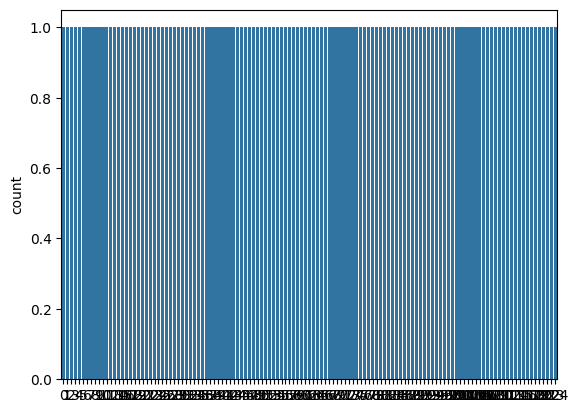

In [ ]:
# Plot the counts of flagged vs not flagged
sns.countplot(resume_df['class'], label = 'Count Plot')

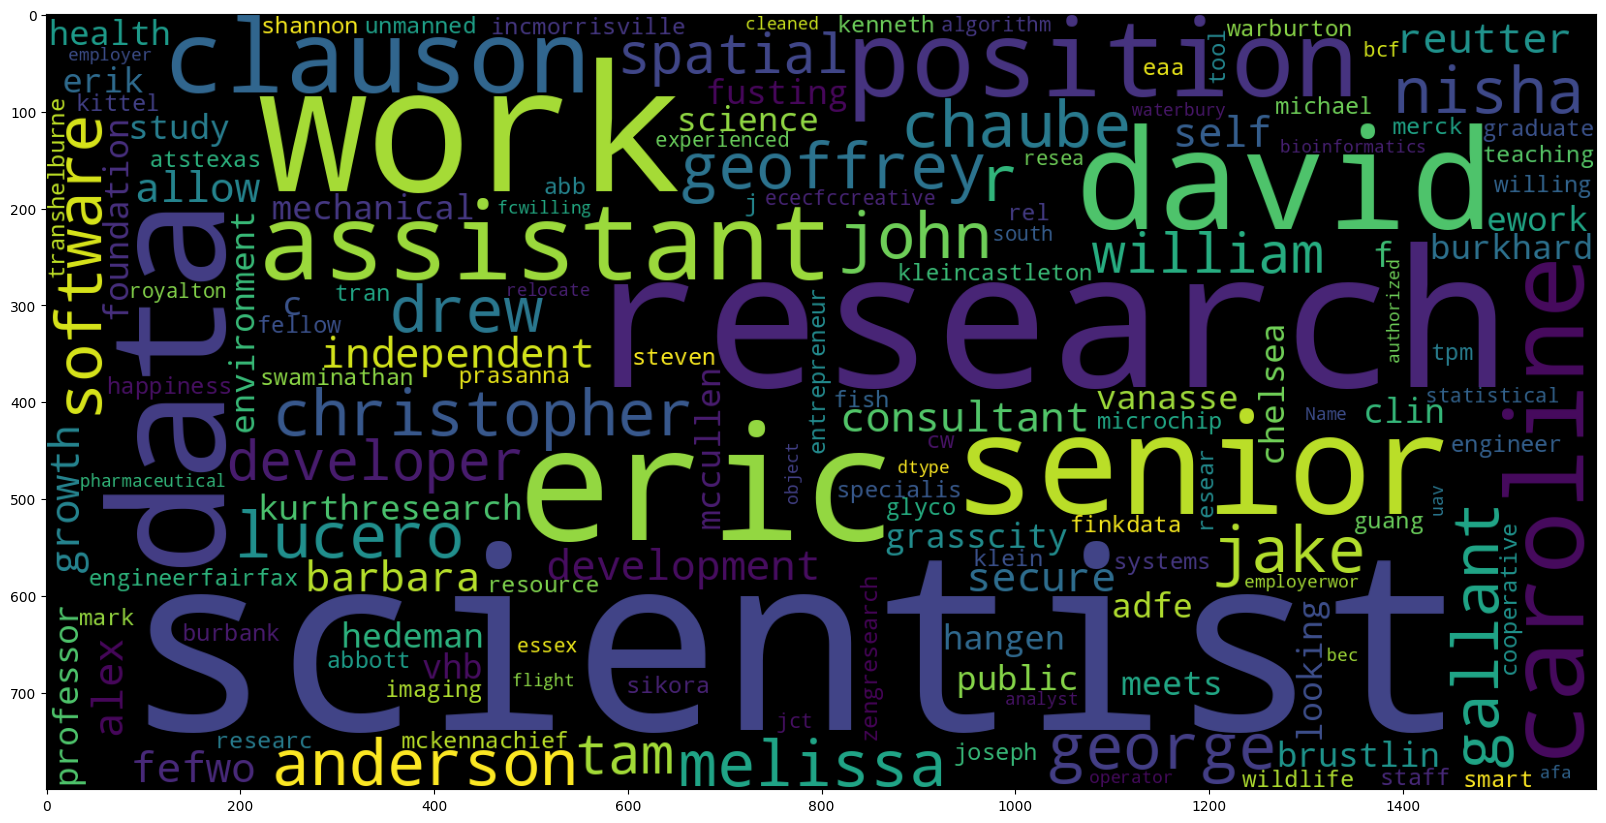

In [ ]:
# plot the word cloud for text that is flagged
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1600, height=800, stopwords=stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))
plt.imshow(wc)

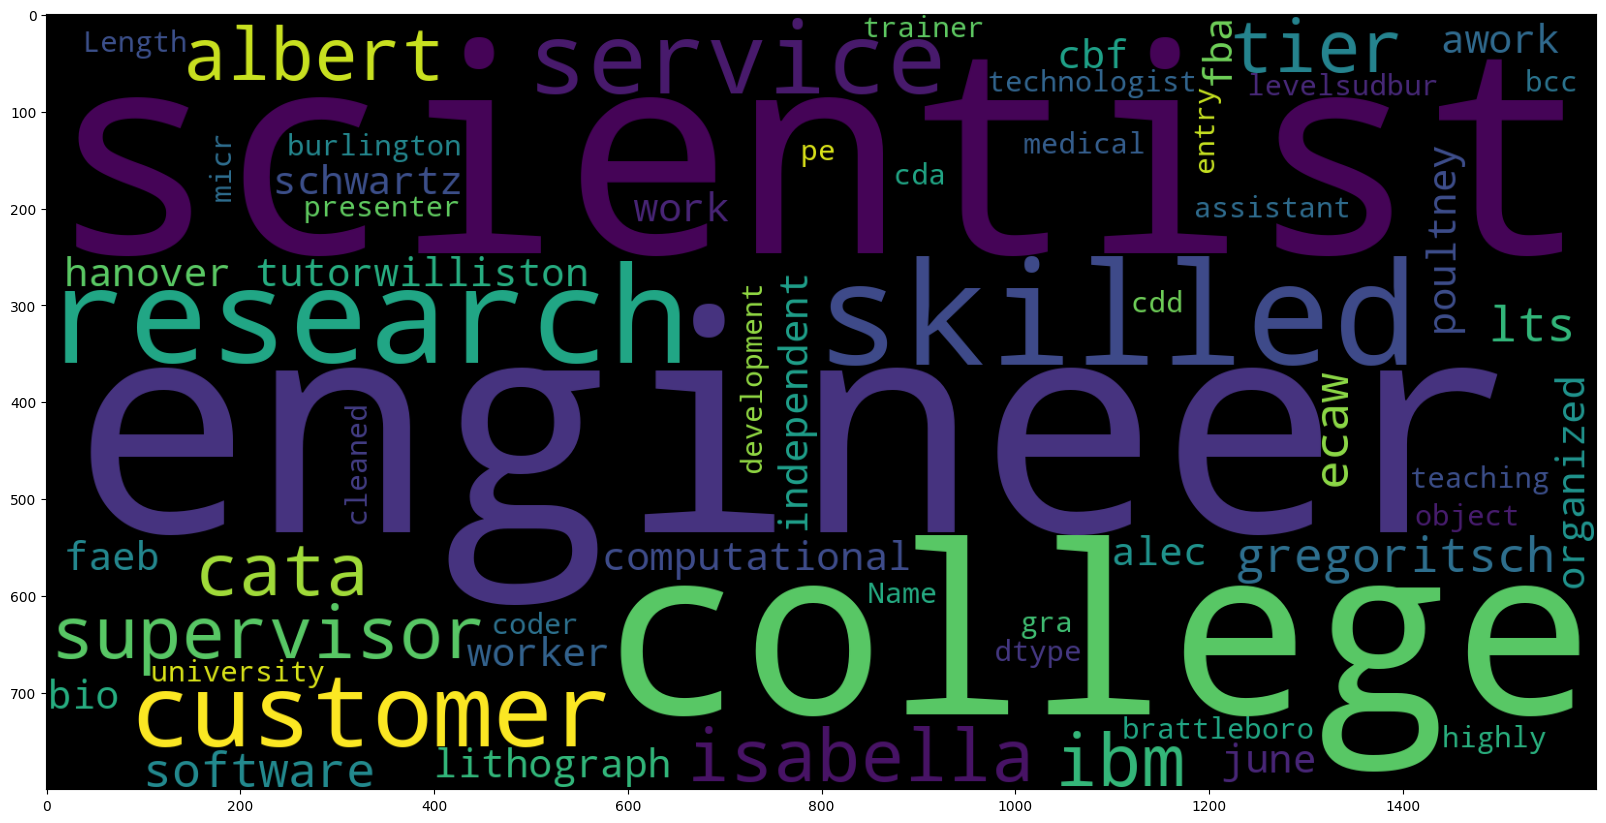

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1600, height=800, stopwords=stop_words).generate(str(resume_df[resume_df['class']==0].cleaned))
plt.imshow(wc)

In [ ]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.', 'This is the second document.', 'And this is the third document.', 'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [ ]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'second' 'the' 'third' 'this']


In [ ]:
print(X.toarray())

[[0 1 1 1 0 1 0 1]
 [0 1 0 1 1 1 0 1]
 [1 1 0 1 0 1 1 1]
 [0 1 1 1 0 1 0 1]]


In [ ]:
# Applying CountVectorier to the cleaned text
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(resume_df['cleaned'])

In [ ]:
print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... 'ãæcomputer' 'ètravel' 'ô_torrent']


In [ ]:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
countvectorizer

# countvectorizer was the sparse matrix that has all my training data that all my cleaned up encoded data.

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 35686 stored elements and shape (125, 11314)>

In [ ]:
X = countvectorizer

In [ ]:
y = resume_df['class']

In [ ]:
X.shape

(125, 11314)

In [ ]:
y.shape

(125,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
X_train.shape

(100, 11314)

In [ ]:
X_test.shape

(25, 11314)

<Axes: >

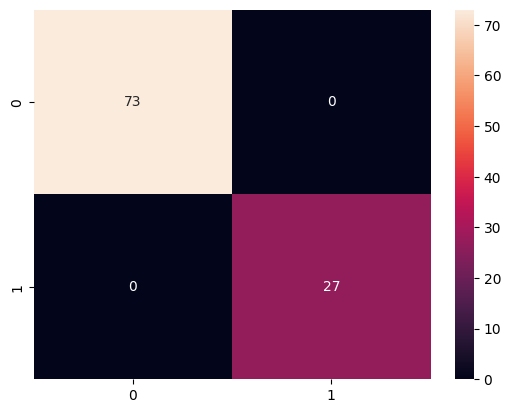

In [ ]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

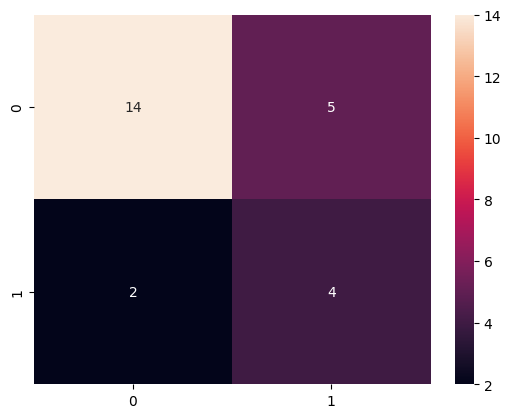

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.44      0.67      0.53         6

    accuracy                           0.72        25
   macro avg       0.66      0.70      0.67        25
weighted avg       0.77      0.72      0.74        25

